In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [3]:
df = pd.read_csv("breast-cancer.csv", header=None)
df.shape


(699, 11)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
# assign column names that come from https://www.kaggle.com/code/prashant111/knn-classifier-tutorial
colnames = ['id', 'clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape', 'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df.columns = colnames
df.head(2)

,id,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2


In [6]:
# id is useless while clustering
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   clump_thickness              699 non-null    int64 
 1   uniformity_cell_size         699 non-null    int64 
 2   uniformity_cell_shape        699 non-null    int64 
 3   marginal_adhesion            699 non-null    int64 
 4   single_epithelial_cell_size  699 non-null    int64 
 5   bare_nuclei                  699 non-null    object
 6   bland_chromatin              699 non-null    int64 
 7   normal_nucleoli              699 non-null    int64 
 8   mitoses                      699 non-null    int64 
 9   class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [8]:
for column in df.columns:
    print(f"Frequency distribution for {column}:")
    print(df[column].value_counts())
    print("\n")

Frequency distribution for clump_thickness:
clump_thickness
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: count, dtype: int64


Frequency distribution for uniformity_cell_size:
uniformity_cell_size
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: count, dtype: int64


Frequency distribution for uniformity_cell_shape:
uniformity_cell_shape
1     353
2      59
10     58
3      56
4      44
5      34
7      30
6      30
8      28
9       7
Name: count, dtype: int64


Frequency distribution for marginal_adhesion:
marginal_adhesion
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: count, dtype: int64


Frequency distribution for single_epithelial_cell_size:
single_epithelial_cell_size
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: count, dtype: int64


Frequency 

In [9]:
df['bare_nuclei'] = df['bare_nuclei'].replace('?', 0).astype(int)
df['bare_nuclei'].unique()

array([ 1, 10,  2,  4,  3,  9,  7,  0,  5,  8,  6])

In [10]:
#target variable
df['class'].value_counts()

class
2    458
4    241
Name: count, dtype: int64

In [11]:
df1 = df[df['class'] == 2]
percentage = float(df1['class'].count() / df['class'].count()) * 100
print(f'Percentage of class == 2 in the data is {percentage:.3f}')

Percentage of class == 2 in the data is 65.522


In [12]:
df['class'].value_counts() / len(df)

class
2    0.655222
4    0.344778
Name: count, dtype: float64

In [15]:
df.describe()

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.463519,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.640708,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


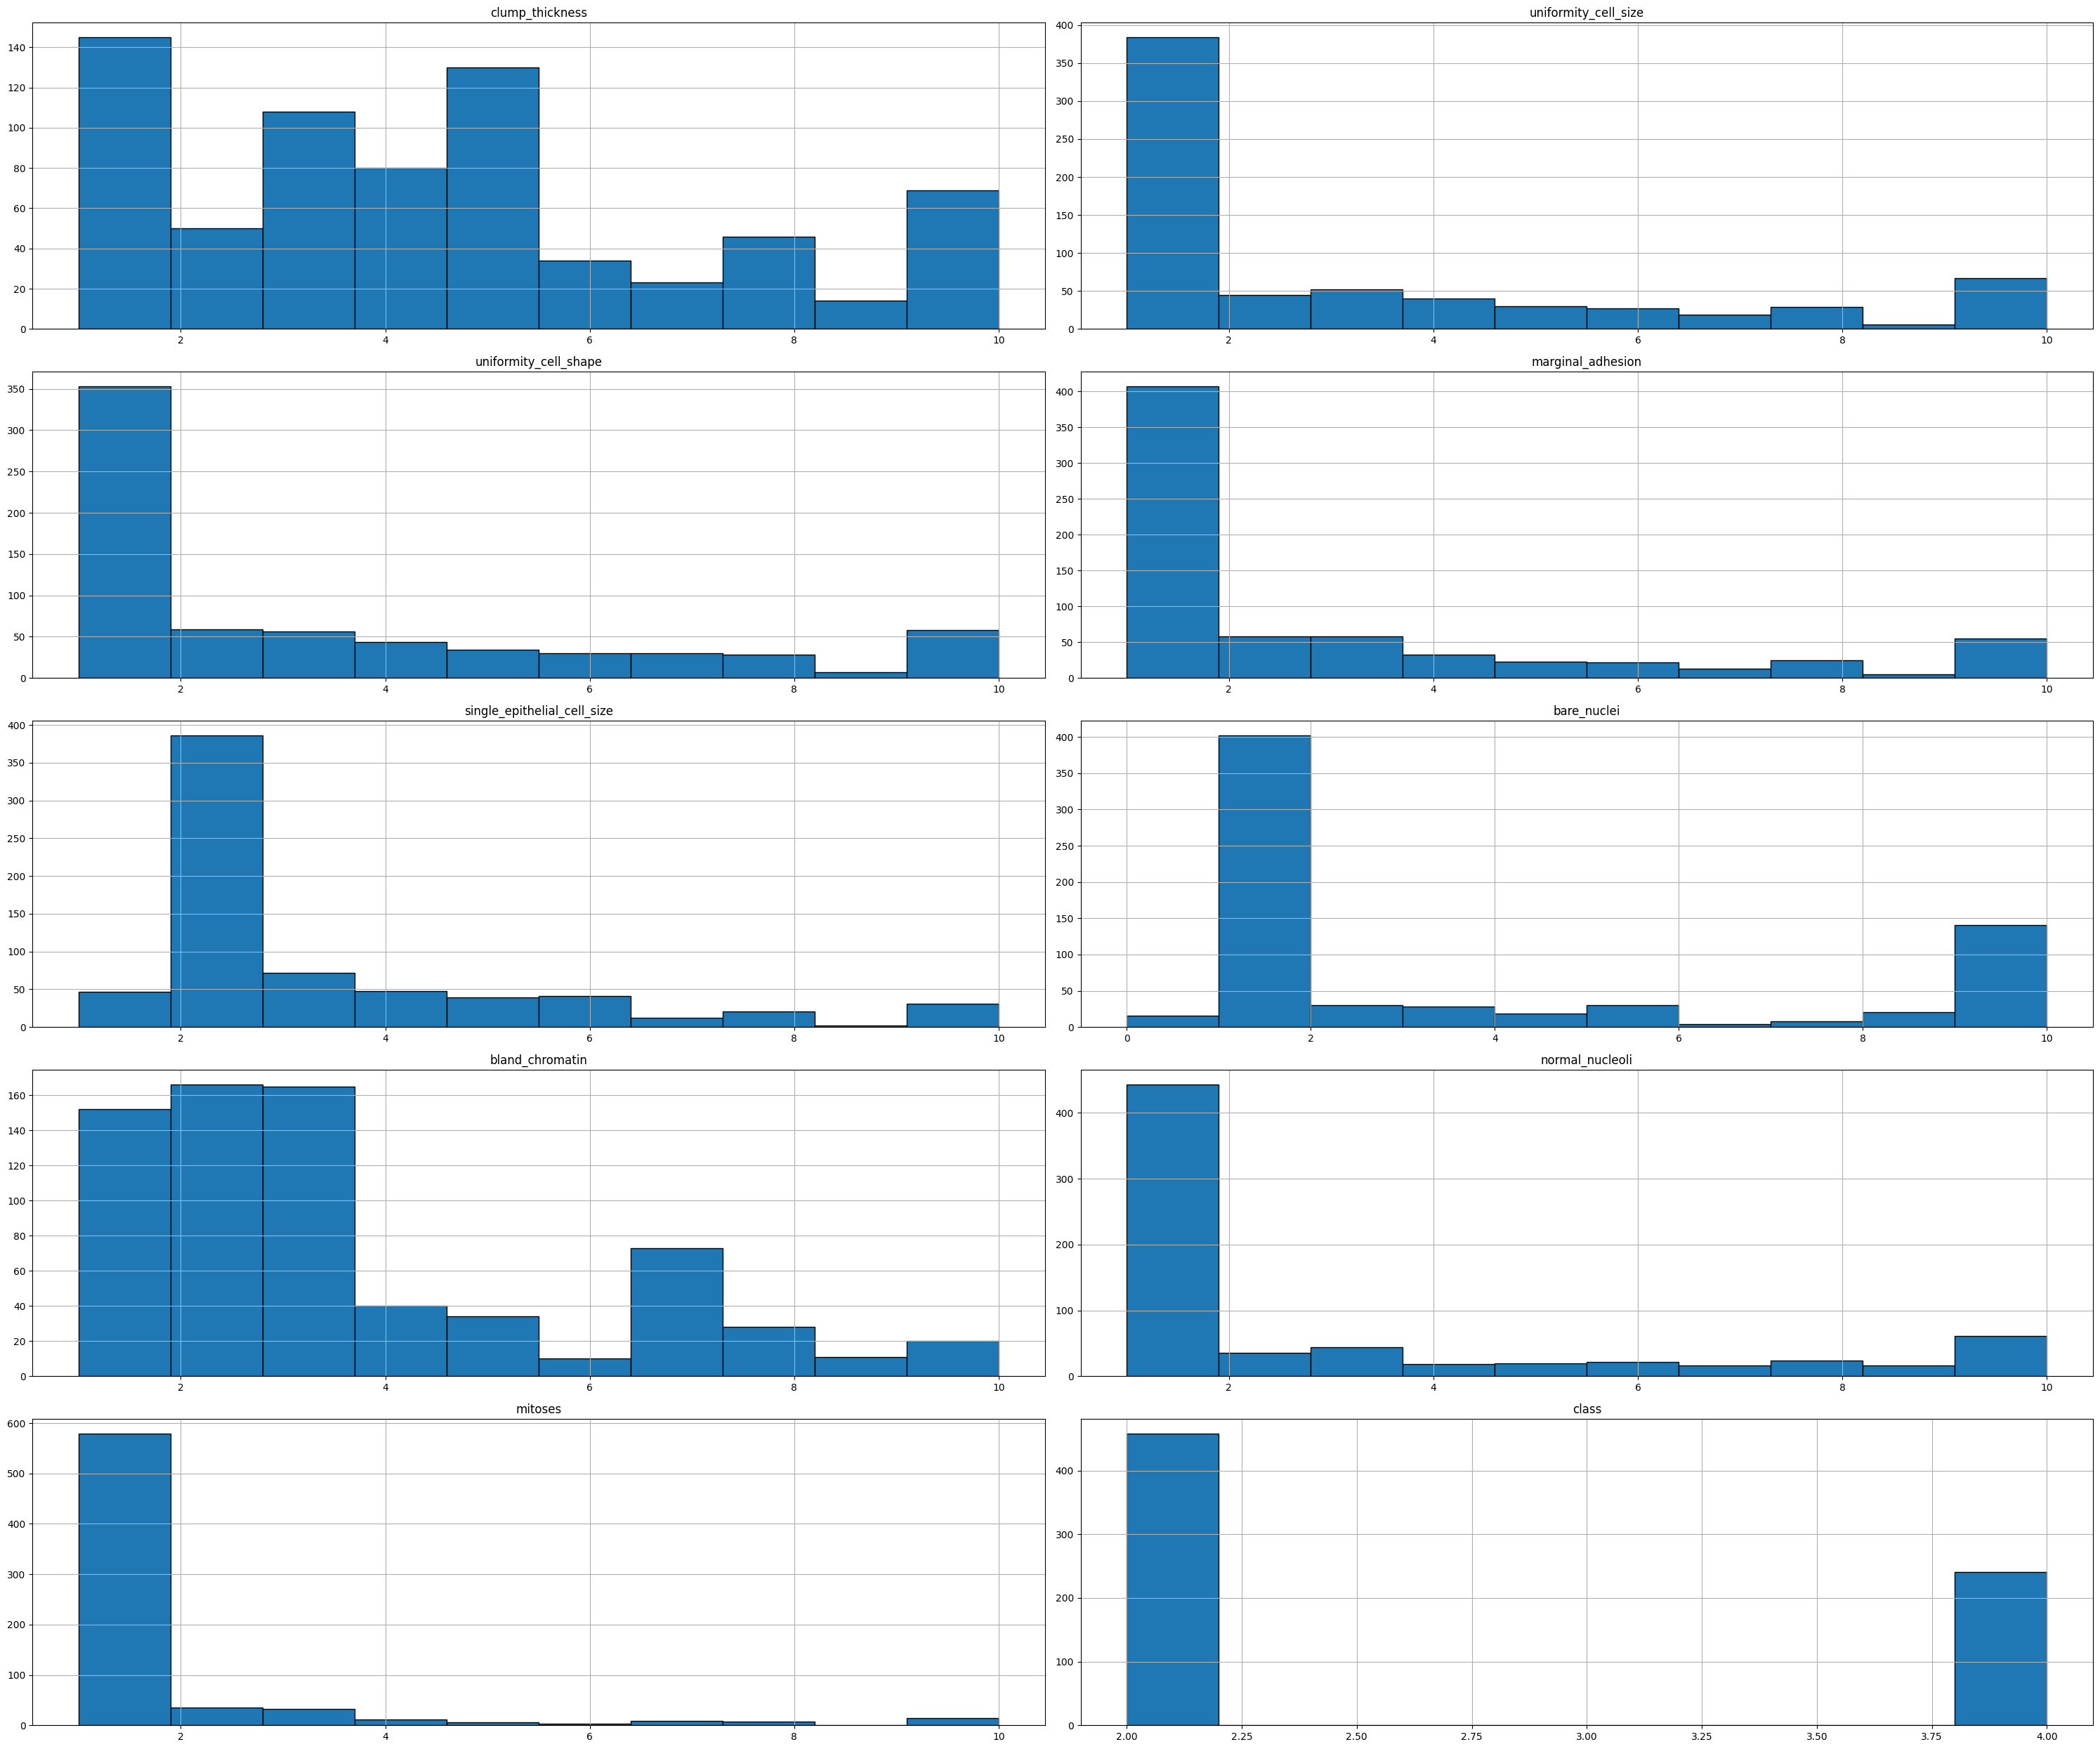

In [19]:
plt.rcParams['figure.figsize']=(30,25)
df.hist(layout=(5, 2), bins=10, edgecolor='black')
plt.tight_layout()
plt.show()

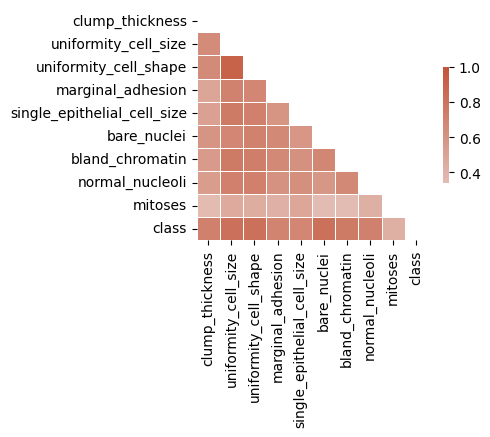

In [ ]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [28]:
X = df.drop('class', axis=1)
y = df['class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [30]:
X_train.shape, X_test.shape

((139, 9), (560, 9))

In [33]:
print (X_train.dtypes, '\n', X_test.dtypes)

clump_thickness                int64
uniformity_cell_size           int64
uniformity_cell_shape          int64
marginal_adhesion              int64
single_epithelial_cell_size    int64
bare_nuclei                    int64
bland_chromatin                int64
normal_nucleoli                int64
mitoses                        int64
dtype: object 
 clump_thickness                int64
uniformity_cell_size           int64
uniformity_cell_shape          int64
marginal_adhesion              int64
single_epithelial_cell_size    int64
bare_nuclei                    int64
bland_chromatin                int64
normal_nucleoli                int64
mitoses                        int64
dtype: object


In [40]:
X_train.isnull().sum()

clump_thickness                0
uniformity_cell_size           0
uniformity_cell_shape          0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
dtype: int64

In [41]:
X_test.isnull().sum()

clump_thickness                0
uniformity_cell_size           0
uniformity_cell_shape          0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
dtype: int64

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [50]:
X_train_scaled_df.head()

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,-0.448297,-0.645302,-0.716112,-0.561694,-0.490712,0.595963,-1.058249,-0.579293,-0.303455
1,-1.194563,-0.645302,-0.716112,-0.561694,-0.951584,-0.862468,-0.601427,-0.579293,-0.303455
2,2.163636,0.778459,1.817622,2.987189,-0.029841,2.054394,0.769038,-0.579293,1.126385
3,0.297970,0.422519,1.093698,2.987189,-0.490712,2.054394,0.312216,-0.579293,-0.303455
4,0.297970,2.558160,2.541546,0.226947,1.813646,0.012591,2.139504,2.427744,0.411465


In [51]:
X_test_scaled_df.head()

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,-0.075164,-0.645302,-0.354150,-0.561694,-0.490712,-0.570782,-1.058249,-0.579293,-0.303455
1,-0.075164,-0.289361,-0.354150,-0.561694,-0.490712,-0.570782,-0.601427,-0.579293,-0.303455
2,0.671103,1.134399,1.093698,2.592869,1.352774,-0.862468,1.682682,1.759514,-0.303455
3,0.297970,-0.645302,-0.716112,-0.561694,-0.490712,-0.570782,-0.601427,-0.245178,-0.303455
4,1.417369,1.490340,0.731736,2.987189,1.813646,1.762708,0.769038,0.757168,1.841305


In [56]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier
# instantiate the model
knn = KNeighborsClassifier(n_neighbors=5)
# fit the model to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [57]:
ypred = knn.predict(X_test)
ypred

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2,
       2, 4, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4,
       2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 2, 4,
       2, 2, 2, 4, 4, 4, 2, 2, 4, 2, 4, 2, 4, 4, 2,

In [58]:
knn.predict_proba(X_test)[:,0]

array([1. , 1. , 0. , 1. , 0. , 1. , 0. , 1. , 0. , 0.2, 1. , 1. , 0. ,
       0.2, 0. , 1. , 1. , 0. , 0.2, 1. , 0. , 0. , 1. , 1. , 1. , 0. ,
       1. , 1. , 0. , 0. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0. , 1. ,
       1. , 1. , 1. , 1. , 1. , 0. , 0. , 1. , 0. , 1. , 0. , 0. , 1. ,
       1. , 0. , 1. , 1. , 1. , 1. , 1. , 1. , 0. , 1. , 1. , 0. , 0.2,
       0. , 0. , 1. , 1. , 0. , 1. , 1. , 0. , 0. , 1. , 1. , 1. , 1. ,
       0. , 1. , 1. , 1. , 0. , 1. , 1. , 1. , 0. , 1. , 0. , 0. , 1. ,
       1. , 0.6, 0. , 1. , 1. , 1. , 0. , 1. , 0. , 0. , 1. , 1. , 1. ,
       0.2, 1. , 1. , 1. , 1. , 1. , 0. , 0. , 0. , 1. , 1. , 1. , 1. ,
       1. , 0. , 0. , 0. , 0. , 1. , 0. , 1. , 1. , 0.2, 0. , 0. , 0. ,
       0. , 1. , 1. , 0.2, 0. , 1. , 1. , 0. , 1. , 1. , 0. , 0. , 1. ,
       1. , 1. , 1. , 1. , 0.8, 1. , 1. , 1. , 0. , 0. , 0.6, 1. , 1. ,
       1. , 1. , 1. , 1. , 0. , 1. , 0.8, 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 0. , 1. , 1. , 1. , 1. , 0. , 1. , 0. , 0. , 1. , 0.

In [59]:
knn.predict_proba(X_test)[:,1]

array([0. , 0. , 1. , 0. , 1. , 0. , 1. , 0. , 1. , 0.8, 0. , 0. , 1. ,
       0.8, 1. , 0. , 0. , 1. , 0.8, 0. , 1. , 1. , 0. , 0. , 0. , 1. ,
       0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ,
       0. , 0. , 0. , 0. , 0. , 1. , 1. , 0. , 1. , 0. , 1. , 1. , 0. ,
       0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 1. , 0.8,
       1. , 1. , 0. , 0. , 1. , 0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. ,
       1. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 1. , 0. , 1. , 1. , 0. ,
       0. , 0.4, 1. , 0. , 0. , 0. , 1. , 0. , 1. , 1. , 0. , 0. , 0. ,
       0.8, 0. , 0. , 0. , 0. , 0. , 1. , 1. , 1. , 0. , 0. , 0. , 0. ,
       0. , 1. , 1. , 1. , 1. , 0. , 1. , 0. , 0. , 0.8, 1. , 1. , 1. ,
       1. , 0. , 0. , 0.8, 1. , 0. , 0. , 1. , 0. , 0. , 1. , 1. , 0. ,
       0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 1. , 1. , 0.4, 0. , 0. ,
       0. , 0. , 0. , 0. , 1. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 1. , 0. , 0. , 0. , 0. , 1. , 0. , 1. , 1. , 0. , 1.

In [65]:
# print the scores on training and test set
print('Null accuracy score: {:0.4f}'.format(max(y_test.value_counts())/(len(y_test))))
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))


Null accuracy score: 0.6482
Training set score: 0.9712
Test set score: 0.9661


In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[354   9]
 [ 10 187]]

True Positives(TP) =  354

True Negatives(TN) =  187

False Positives(FP) =  9

False Negatives(FN) =  10


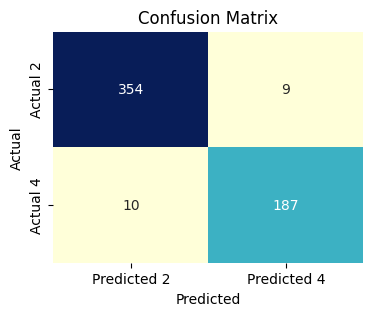

In [71]:
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False, xticklabels=['Predicted 2', 'Predicted 4'], yticklabels=['Actual 2', 'Actual 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [72]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.92857143 0.96428571 1.         0.92857143 0.96296296]
Average cross-validation score: 0.9569
